In [70]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [71]:
# data 
x = np.array([24,50,50,90,90,100]).reshape(-1,1)
y =np.array([3,8,7,18,20,22])

In [72]:
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
m = model.coef_[0] #Slope (m)

b = model.intercept_

print(f"Slope = (m) {m:.2f}")

print(f"intercept = (b) {b:.2f}")

Slope = (m) 0.26
intercept = (b) -4.52


In [74]:
# prediction 

prediction = model.predict([[0]])[0]

print(f"preiction sales  {prediction:.2f}")

preiction sales  -4.52


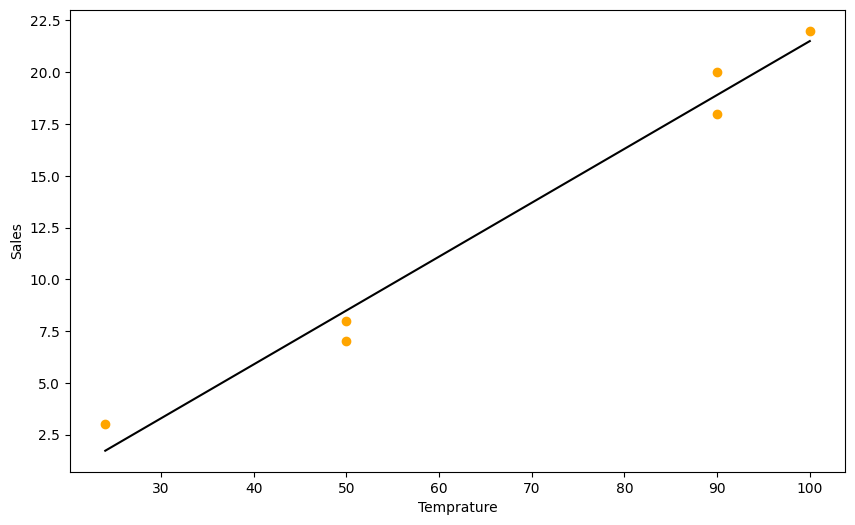

In [75]:

plt.figure(figsize=(10,6))
plt.scatter(x,y,color = "Orange",label = "Data Point")

plt.plot(x,model.predict(x),color = "black",label = "Best Fir Line")
plt.xlabel("Temprature")
plt.ylabel("Sales")
plt.show()

## Logistics Regression 

In [76]:
import numpy as np
import pandas as pd

# set random seed 
np.random.seed(42)

n_samples = 2000


study_hours = np.random.normal(5,2,n_samples).clip(0,10) # mean 5, std 2 m clipped = 0-10

sleep_hours = np.random.normal(7,2,n_samples).clip(4,10)

prior_test_score  = np.random.normal(40,15,n_samples).clip(0,100)

# simulate pass/fail  (1/0)
logit = -5 + 0.5  * study_hours +0.3 *sleep_hours +0.05 *prior_test_score

probs = 1 / (1+np.exp(-logit))

pass_exam = (probs > 0.5+ np.random.normal(0,0.1,n_samples)).astype(int)

data = pd.DataFrame({
    'study_hours':study_hours,
    'sleep_hours':sleep_hours,
    'prior_test_score': prior_test_score,
    'pass_exam':pass_exam
})

data.to_csv('Students_data.csv',index = False)






# print(probs)  # sigmode function

In [77]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt







In [78]:
data = pd.read_csv('students_data.csv')

In [79]:
x = data[['study_hours','sleep_hours','prior_test_score']]

y = data['pass_exam']



In [80]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)



In [81]:
# model 
model = LogisticRegression(max_iter = 200)

model.fit(x_train,y_train)

# predict on test data 

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

conf_matrix = confusion_matrix(y_test,y_pred)

print(conf_matrix)

print(y_pred)




0.94
[[ 27  18]
 [  6 349]]
[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [82]:
print(f"{accuracy*100:.2f}%")

print(conf_matrix)
print(f"Intercept A0 = {model.intercept_[0]:.4f}")
print(f"coefficiant A1 for each feature = {model.coef_[0]}")



94.00%
[[ 27  18]
 [  6 349]]
Intercept A0 = -22.0163
coefficiant A1 for each feature = [2.21413946 1.30120203 0.22239312]


In [83]:
new_student = np.array([[2,4,45]]) # 5 study_hours 7 sleep_hours 80

pred_prob = model.predict_proba(new_student)[0][1]  # probability of pasing

pred_class = model.predict(new_student)[0]

print(f"new student 5 study hrs,7 sleep and 80 score")
print(f"predicted probability {pred_prob:.4f}")
print(f"predicted class {pred_class} [0 fail /1 pass]")


new student 5 study hrs,7 sleep and 80 score
predicted probability 0.0851
predicted class 0 [0 fail /1 pass]


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


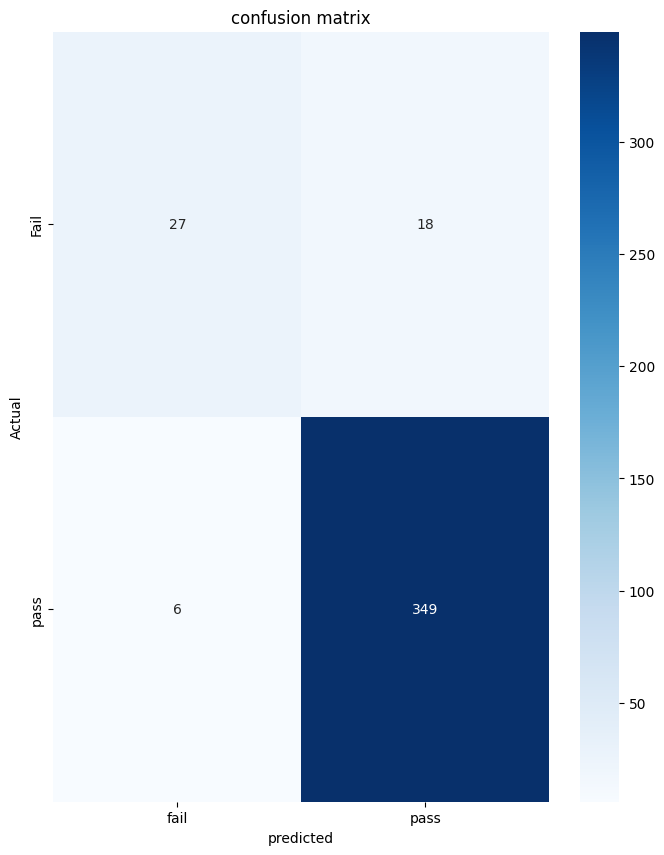

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,10))

sns.heatmap(conf_matrix,annot = True,fmt="d",cmap = "Blues",
            xticklabels = ["fail","pass"],yticklabels = ["Fail","pass"])

plt.title ("confusion matrix")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

